# CASE STUDY: BELLABEAT APP

*Author: Julio Venero*

*June - 2021*

## INTRODUCTION

Case study from the Google Data Analytics Certificate (Bellabeat).

Originally based on the case study “FitBit Fitness Tracker Data” by Möbius [found here](https://www.kaggle.com/arashnic/fitbit).

**OBJECTIVES**
* Clean and consolidate the data
* Get insights into how consumers are using their smart data to help guide the marketing strategy for the company.

**Questions to be answered:**
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

**Load necessary Libraries**

In [2]:
import datetime
from datetime import datetime
from numpy.core.fromnumeric import size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.miscplot import palplot

## Data Gathering
 Load the csv files into different dataframes

In [3]:
# Define the working directory (source: https://stackoverflow.com/questions/65511586/vs-code-is-there-a-way-to-read-a-csv-file-without-needing-specification-of-the)

# Get all the files from directory
# Source: https://www.geeksforgeeks.org/getting-all-csv-files-from-a-directory-using-python/

dailyActivity = pd.read_csv('data/dailyActivity_merged.csv')
sleepDay = pd.read_csv('data/sleepDay_merged.csv')
weightInfo = pd.read_csv('data/weightLogInfo_merged.csv')

## Reviewing the Datasets

 1. Daily Activity

In [4]:
print('Number of rows: ',
      dailyActivity.shape[0], '\nNumber of columns: ', dailyActivity.shape[1])



Number of rows:  940 
Number of columns:  15


In [5]:
# Data structure
dailyActivity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

 Descriptive Statistics

In [6]:
dailyActivity.describe(include='all')


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/12/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,NaN,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,NaN,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000


 Distinct Observations for each variable

In [7]:
dailyActivity.nunique()


Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
dtype: int64

 2. Sleep Day

In [8]:
print('Number of rows: ', sleepDay.shape[0],
      '\nNumber of columns: ', sleepDay.shape[1])

Number of rows:  413 
Number of columns:  5


In [9]:
sleepDay.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


 Descriptive statistics

In [10]:
sleepDay.describe(include='all')

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
unique,NaN,31,NaN,NaN,NaN
top,NaN,4/15/2016 12:00:00 AM,NaN,NaN,NaN
freq,NaN,17,NaN,NaN,NaN
mean,5.000979e+09,NaN,1.118644,419.467312,458.639225
std,2.060360e+09,NaN,0.345521,118.344679,127.101607
min,1.503960e+09,NaN,1.000000,58.000000,61.000000
25%,3.977334e+09,NaN,1.000000,361.000000,403.000000
50%,4.702922e+09,NaN,1.000000,433.000000,463.000000
75%,6.962181e+09,NaN,1.000000,490.000000,526.000000


 Distinct Observations for each variable

In [11]:
sleepDay.nunique()

Id                     24
SleepDay               31
TotalSleepRecords       3
TotalMinutesAsleep    256
TotalTimeInBed        242
dtype: int64

 3. Weight Info

In [12]:
print('Number of rows: ', weightInfo.shape[0],
      '\nNumber of columns: ', weightInfo.shape[1])

Number of rows:  67 
Number of columns:  8


In [13]:
weightInfo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


 Descriptive statistics

In [14]:
weightInfo.describe(include='all')


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
count,6.700000e+01,67,67.000000,67.000000,2.00000,67.000000,67,6.700000e+01
unique,NaN,56,NaN,NaN,NaN,NaN,2,NaN
top,NaN,5/2/2016 11:59:59 PM,NaN,NaN,NaN,NaN,True,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,41,NaN
mean,7.009282e+09,NaN,72.035821,158.811801,23.50000,25.185224,NaN,1.461772e+12
std,1.950322e+09,NaN,13.923206,30.695415,2.12132,3.066963,NaN,7.829948e+08
min,1.503960e+09,NaN,52.599998,115.963147,22.00000,21.450001,NaN,1.460444e+12
25%,6.962181e+09,NaN,61.400002,135.363832,22.75000,23.959999,NaN,1.461079e+12
50%,6.962181e+09,NaN,62.500000,137.788914,23.50000,24.389999,NaN,1.461802e+12
75%,8.877689e+09,NaN,85.049999,187.503152,24.25000,25.559999,NaN,1.462375e+12


 Distinct Observations for each variable

In [15]:
weightInfo.nunique()


Id                 8
Date              56
WeightKg          34
WeightPounds      34
Fat                2
BMI               36
IsManualReport     2
LogId             56
dtype: int64

 ## Data Cleaning

 **1. Identify missing data**

In [16]:
# Daily Activity
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [17]:
# Sleep Day
sleepDay.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [18]:
# Weight Info
weightInfo.isnull().sum()


Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

 65 null values identified in Weight Info

 Proceed to handle them

In [19]:
# Percentage of missing values
np.mean(weightInfo['Fat'].isnull())

0.9701492537313433

 The percentage is too high and we only have 2 registers for fat

 Remove the column

In [20]:
weightInfo.drop("Fat", axis=1, inplace=True)


 **2. Identify Outliers**

 Daily Activity

<AxesSubplot:xlabel='Calories'>

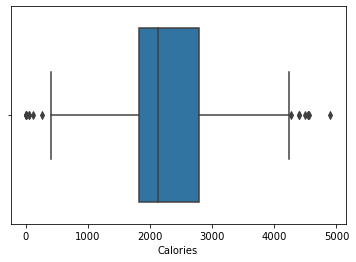

In [21]:
sns.boxplot(data=dailyActivity, x='Calories')

<AxesSubplot:xlabel='Calories', ylabel='Count'>

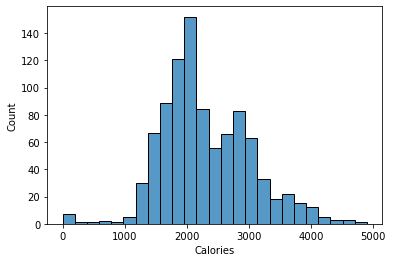

In [22]:
sns.histplot(data=dailyActivity, x="Calories")

 Since the ouliers might lead to insights, we will keep them, but will not be taken into account when calculating the averages

 Add a new column to identify the outliers

 In order to identify each outlier, we will use the Z Score formula

 z = (X - u) / o

In [23]:
dailyActivity['Cal_Z'] = (dailyActivity.Calories - np.average(
    dailyActivity.Calories)) / np.std(dailyActivity.Calories)
dailyActivity['Cal_Outlier'] = np.abs(dailyActivity['Cal_Z']) > 3
len(dailyActivity[dailyActivity['Cal_Outlier'] == True])

12

 Sleep Day

<AxesSubplot:xlabel='TotalMinutesAsleep'>

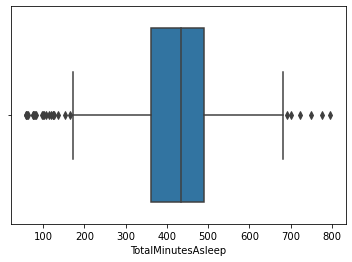

In [24]:
sns.boxplot(data=sleepDay, x='TotalMinutesAsleep')

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='Count'>

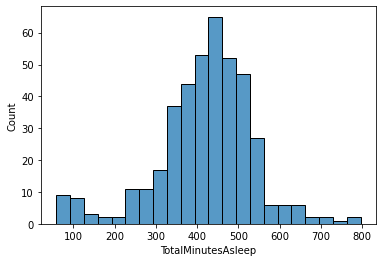

In [25]:
sns.histplot(data=sleepDay, x='TotalMinutesAsleep')

 Same as in Daily Activity, proceed to flag the outliers

In [26]:
sleepDay['MinAsleep_Z'] = (sleepDay.TotalMinutesAsleep - np.average(
    sleepDay.TotalMinutesAsleep)) / np.std(sleepDay.TotalMinutesAsleep)
sleepDay['MinAsleep_Outlier'] = np.abs(sleepDay['MinAsleep_Z']) > 3
len(sleepDay[sleepDay['MinAsleep_Outlier'] == True])

6

 Weight Info

<AxesSubplot:xlabel='WeightKg'>

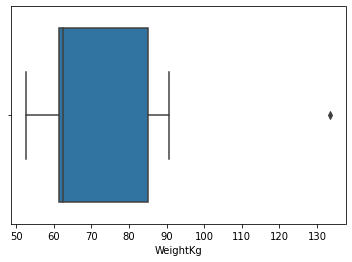

In [27]:
sns.boxplot(data=weightInfo, x='WeightKg')

<AxesSubplot:xlabel='WeightKg', ylabel='Count'>

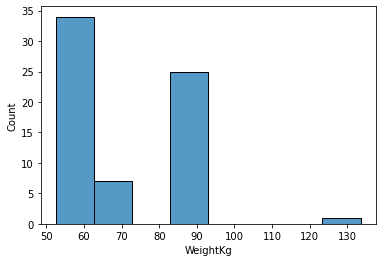

In [28]:
sns.histplot(data=weightInfo, x='WeightKg')

 Same as before, proceed to flag the outliers

In [29]:
weightInfo['Weight_Z'] = (weightInfo.WeightKg - np.average(
    weightInfo.WeightKg)) / np.std(weightInfo.WeightKg)
weightInfo['Weight_Outlier'] = np.abs(weightInfo['Weight_Z']) > 3
len(weightInfo[weightInfo['Weight_Outlier'] == True])


1

 **3. Unnecessary Variables**

In [30]:
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Cal_Z,Cal_Outlier
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,-0.443879,False
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,-0.705796,False
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,-0.735053,False
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,-0.778241,False
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,-0.613846,False


 Remove:
 * Tracker Distance
 * Logged Actitivities Distance
 * Cal_Z

In [31]:
dailyActivity.drop(
    ['TrackerDistance', 'LoggedActivitiesDistance', 'Cal_Z'], axis=1, inplace=True)

In [32]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinAsleep_Z,MinAsleep_Outlier
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,-0.782287,False
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,-0.300059,False
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,-0.063175,False
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,-0.672305,False
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,2.373347,False


 Remove:
 * Total Sleep Records
 * MinAsleep_Z

In [33]:
sleepDay.drop(['TotalSleepRecords', 'MinAsleep_Z'], axis=1, inplace=True)

In [34]:
weightInfo.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId,Weight_Z,Weight_Outlier
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000,-1.406466,False
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000,-1.406466,False
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000,4.447831,True
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000,-1.109771,False
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000,-1.066352,False


 Remove
 * IsManualReport
 * LogId
 * Weight_Z

In [35]:
weightInfo.drop(['IsManualReport', 'LogId', 'Weight_Z'], axis=1, inplace=True)

 **4. Remove duplicates**

 There should be no duplicates for each Id/Date pair

In [36]:
sum(dailyActivity.duplicated(['Id', 'ActivityDate']))

0

In [37]:
sum(sleepDay.duplicated(['Id', 'SleepDay']))

3

In [38]:
sum(weightInfo.duplicated(['Id', 'Date']))

0

 Now, remove the duplicates

In [39]:
sleepDay.drop_duplicates(['Id', 'SleepDay'], inplace=True)


 **5. Clean inconsistent data**

 This includes:
 * Correct Data types
 * Consistent formats
 * Typos

In [40]:
dailyActivity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
Cal_Outlier                    bool
dtype: object

In [41]:
sleepDay.dtypes

Id                     int64
SleepDay              object
TotalMinutesAsleep     int64
TotalTimeInBed         int64
MinAsleep_Outlier       bool
dtype: object

In [42]:
weightInfo.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
BMI               float64
Weight_Outlier       bool
dtype: object

 Incorrect data types for the dates columns in all the dataframes

 Proceed to modify them

In [43]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])\
    .apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])\
    .apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
weightInfo['Date'] = pd.to_datetime(weightInfo['Date'])\
    .apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))


 ## Data Modeling

 **1. Combine the datasets**

 The tables will be joined by ID and Date
 First, rename the Date columns to facilitate the join

In [44]:
dailyActivity.rename(columns={'ActivityDate': 'Date'}, inplace=True)
sleepDay.rename(columns={'SleepDay': 'Date'}, inplace=True)

 Join the datasets

In [45]:
dailyData = dailyActivity.merge(sleepDay, on=['Id', 'Date'], how='left').merge(
    weightInfo, on=['Id', 'Date'], how='left')

 **2. Enrich the new dataset**

 Date Enrichment

In [46]:
dailyData = dailyData.assign(
    Weekday=dailyData['Date'].dt.strftime('%A'),
    Month=dailyData['Date'].dt.month,
    Year=dailyData['Date'].dt.year
)

In [47]:
# Reorder weekday categories
dailyData['Weekday'] = dailyData['Weekday'].astype('category')
dailyData['Weekday'] = dailyData['Weekday'].\
    cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday',
                            'Thursday', 'Friday', 'Saturday', 'Sunday'])

 Add Total Minutes variable

In [48]:
dailyData['TotalMinutes'] = dailyData['SedentaryMinutes'] +\
    dailyData['LightlyActiveMinutes'] +\
    dailyData['FairlyActiveMinutes'] +\
    dailyData['VeryActiveMinutes']

**3. Create a long version of the data**

In [50]:
dailyDataLong = pd.melt(dailyData, id_vars=['Id', 'Date', 'TotalSteps', 'TotalDistance',
                                            'Calories', 'Cal_Outlier', 'TotalMinutesAsleep',
                                            'TotalTimeInBed', 'MinAsleep_Outlier', 'WeightKg',
                                            'WeightPounds', 'BMI', 'Weight_Outlier',
                                            'TotalMinutes', 'SedentaryMinutes',
                                            'LightlyActiveMinutes', 'FairlyActiveMinutes',
                                            'VeryActiveMinutes', 'Weekday', 'Month', 'Year'],
                        var_name='DistanceActivityType', value_name='Distance')
dailyDataLong = pd.melt(dailyDataLong, id_vars=['Id', 'Date', 'TotalSteps', 'TotalDistance',
                                                'Calories', 'Cal_Outlier', 'TotalMinutesAsleep',
                                                'TotalTimeInBed', 'MinAsleep_Outlier', 'WeightKg',
                                                'WeightPounds', 'BMI', 'Weight_Outlier',
                                                'TotalMinutes', 'DistanceActivityType', 'Distance',
                                                'Weekday', 'Month', 'Year'],
                        var_name='MinutesActivityType', value_name='Minutes')

# Enrich the long version
dailyDataLong['Hours'] = (dailyDataLong['Minutes']/60).round(1)

 Convert new variables to factors

In [51]:
dailyDataLong['DistanceActivityType'] = dailyDataLong['DistanceActivityType'].astype(
    'category')
dailyDataLong['MinutesActivityType'] = dailyDataLong['MinutesActivityType'].astype(
    'category')

 Rename the categories

In [52]:
dailyDataLong['DistanceActivityType'] = dailyDataLong['DistanceActivityType'].\
    cat.rename_categories({'LightActiveDistance': 'Lightly Active',
                           'ModeratelyActiveDistance': 'Moderately Active',
                           'SedentaryActiveDistance': 'Sedentary Active',
                           'VeryActiveDistance': 'Very Active'})
dailyDataLong['MinutesActivityType'] = dailyDataLong['MinutesActivityType'].\
    cat.rename_categories({'FairlyActiveMinutes': 'Moderately Active',
                           'LightlyActiveMinutes': 'Lightly Active',
                           'SedentaryMinutes': 'Sedentary Active',
                           'VeryActiveMinutes': 'Very Active'})


 Reorder the categories

In [53]:
dailyDataLong['DistanceActivityType'] = dailyDataLong['DistanceActivityType'].\
    cat.reorder_categories(["Sedentary Active", "Lightly Active",
                            "Moderately Active", "Very Active"])
dailyDataLong['MinutesActivityType'] = dailyDataLong['MinutesActivityType'].\
    cat.reorder_categories(["Sedentary Active", "Lightly Active",
                            "Moderately Active", "Very Active"])

## Exploratory Data Analysis

 Descriptive Statistics

In [54]:
dailyData.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,BMI,Month,Year,TotalMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,410.000000,410.000000,67.000000,67.000000,67.000000,940.000000,940.0,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,419.173171,458.482927,72.035821,158.811801,25.185224,4.350000,2016.0,1218.753191
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,118.635918,127.455140,13.923206,30.695415,3.066963,0.477224,0.0,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,61.000000,52.599998,115.963147,21.450001,4.000000,2016.0,2.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,361.000000,403.750000,61.400002,135.363832,23.959999,4.000000,2016.0,989.750000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,432.500000,463.000000,62.500000,137.788914,24.389999,4.000000,2016.0,1440.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,490.000000,526.000000,85.049999,187.503152,25.559999,5.000000,2016.0,1440.000000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,796.000000,961.000000,133.500000,294.317120,47.540001,5.000000,2016.0,1440.000000


 Univariate Analysis

<AxesSubplot:xlabel='WeightKg', ylabel='Count'>

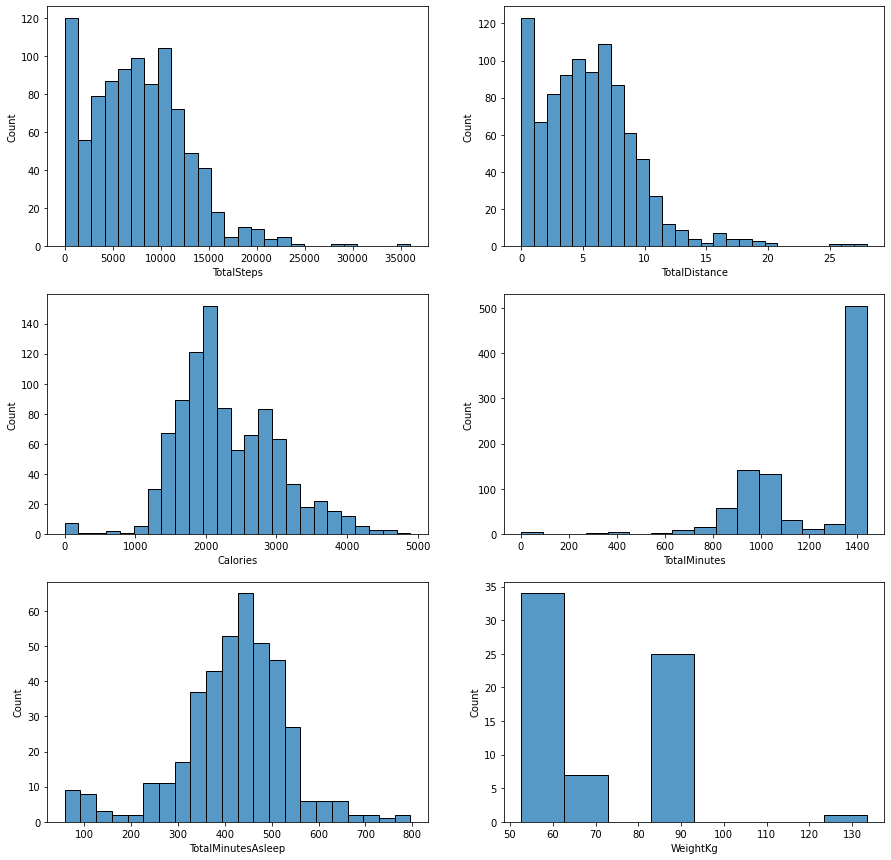

In [55]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.histplot(data=dailyData, x='TotalSteps', ax=axs[0, 0])
sns.histplot(data=dailyData, x='TotalDistance', ax=axs[0, 1])
sns.histplot(data=dailyData, x='Calories', ax=axs[1, 0])
sns.histplot(data=dailyData, x='TotalMinutes', ax=axs[1, 1])
sns.histplot(data=dailyData, x='TotalMinutesAsleep', ax=axs[2, 0])
sns.histplot(data=dailyData, x='WeightKg', ax=axs[2, 1])

<AxesSubplot:xlabel='WeightKg'>

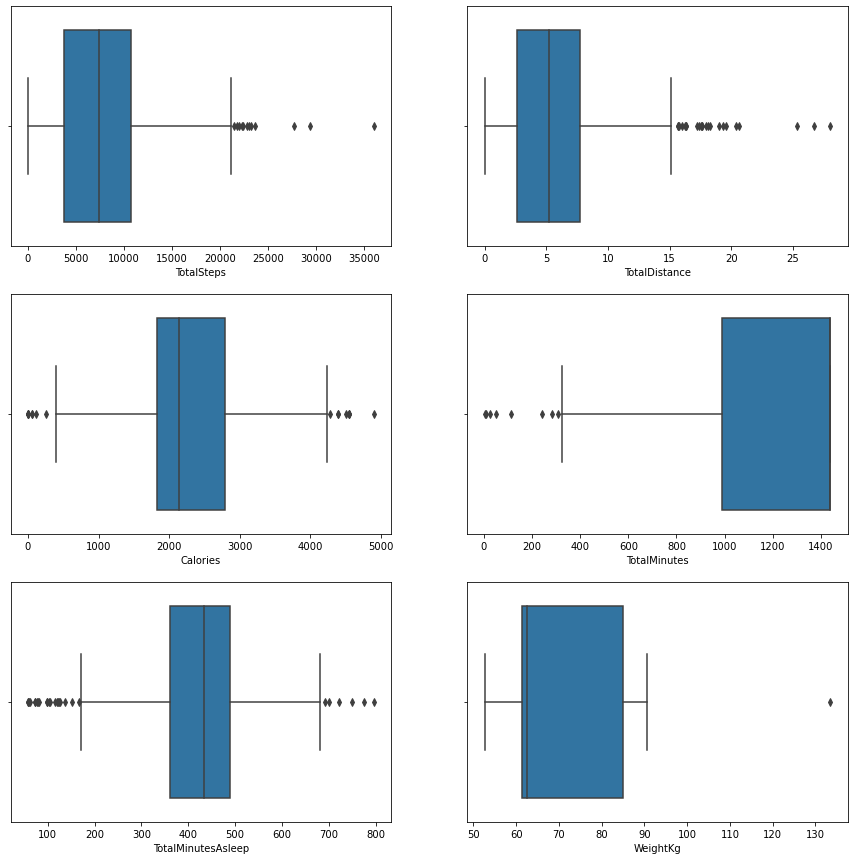

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
sns.boxplot(data=dailyData, x='TotalSteps', ax=axs[0, 0])
sns.boxplot(data=dailyData, x='TotalDistance', ax=axs[0, 1])
sns.boxplot(data=dailyData, x='Calories', ax=axs[1, 0])
sns.boxplot(data=dailyData, x='TotalMinutes', ax=axs[1, 1])
sns.boxplot(data=dailyData, x='TotalMinutesAsleep', ax=axs[2, 0])
sns.boxplot(data=dailyData, x='WeightKg', ax=axs[2, 1])

 Multivariate Analysis

<AxesSubplot:>

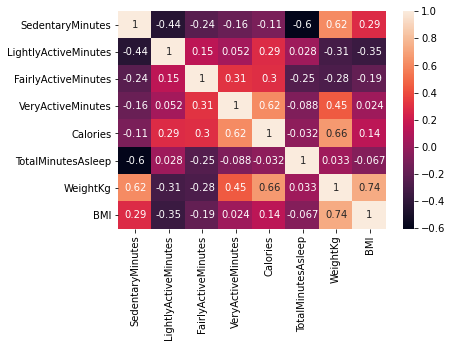

In [57]:
# Correlation Matrix
correlation = dailyData[['SedentaryMinutes', 'LightlyActiveMinutes',
                         'FairlyActiveMinutes', 'VeryActiveMinutes',
                         'Calories', 'TotalMinutesAsleep',
                         'WeightKg', 'BMI']].corr()
sns.heatmap(correlation, xticklabels=correlation.columns,
            yticklabels=correlation.columns, annot=True)


 Correlations (-1, 1):
 * Negative correlation between Minutes Asleep and Sedentary Minutes (-0.6)
 * Positive correlation between Very Active Minutes and Calories burned (0.62)

 According to the previous insights, we can define the following hypothesis:
 * People who sleep longer tend to be less sedentary
 * People who do more minutes of very active exercise tend to burn more calories

## Analysis Questions

 **1. What are the average distance and minutes on activity throughout the week?**

Text(0.5, 1.0, 'Users travel the longest distances on Tuesday and the shortest on Sundays')

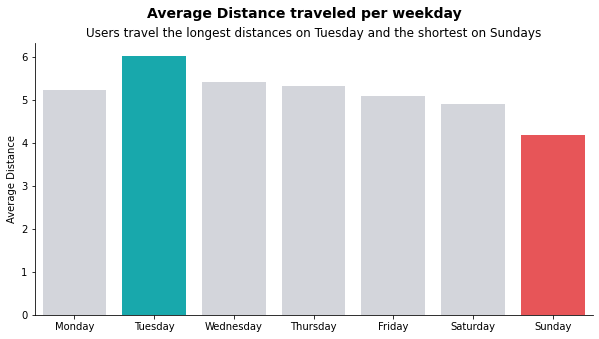

In [58]:
# Skewed distribution, use median instead of mean
distanceByWeek = dailyData.groupby('Weekday').agg({'TotalDistance': np.median})
fig, ax = plt.subplots(figsize=(10, 5))

# https://stackoverflow.com/questions/35143672/seaborn-conditional-colors-based-on-value
custom_palette = {}
for q in set(dailyData['Weekday']):
    if q == 'Tuesday':
        custom_palette[q] = '#00BFC4'
    elif q == 'Sunday':
        custom_palette[q] = '#FF3D41'
    else:
        custom_palette[q] = '#D2D4DC'

sns.barplot(ax=ax, data=distanceByWeek, x=distanceByWeek.index,
            y='TotalDistance', palette=custom_palette)
ax.set_xlabel('')
ax.set_ylabel('Average Distance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Average Distance traveled per weekday', size=14, weight='bold')
plt.title('Users travel the longest distances on Tuesday and the shortest on Sundays')

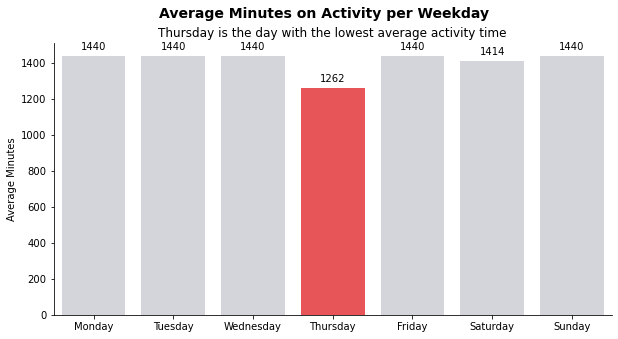

In [59]:
# Skewed distribution, use median instead of mean
distanceByWeek = dailyData.groupby('Weekday').agg({'TotalMinutes': np.median})
fig, ax = plt.subplots(figsize=(10, 5))

# https://stackoverflow.com/questions/35143672/seaborn-conditional-colors-based-on-value
custom_palette = {}
for q in set(dailyData['Weekday']):
    if q == 'Thursday':
        custom_palette[q] = '#FF3D41'
    else:
        custom_palette[q] = '#D2D4DC'

bplot = sns.barplot(ax=ax, data=distanceByWeek, x=distanceByWeek.index,
                    y='TotalMinutes', palette=custom_palette)
ax.set_xlabel('')
ax.set_ylabel('Average Minutes')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Average Minutes on Activity per Weekday', size=14, weight='bold')
plt.title('Thursday is the day with the lowest average activity time')

for p in bplot.patches:
    bplot.annotate(int(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')


 **2. What type of activity is the most common among users?**

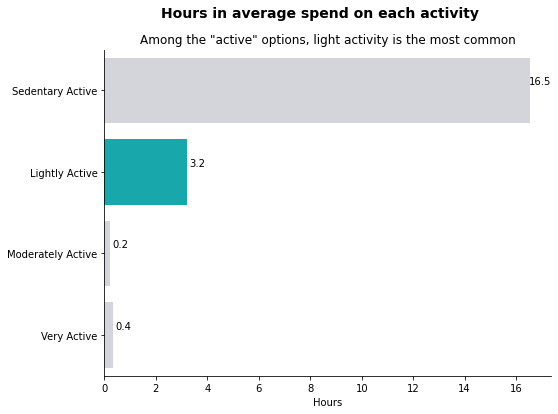

In [60]:
AvgMinPerActivity = dailyDataLong.groupby(
    'MinutesActivityType').agg({'Hours': np.average}).reset_index()

custom_palette = {}
for q in set(dailyDataLong['MinutesActivityType']):
    if q == 'Lightly Active':
        custom_palette[q] = '#00BFC4'
    else:
        custom_palette[q] = '#D2D4DC'

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
bplot = sns.barplot(ax=ax, data=AvgMinPerActivity,
                    x='Hours', y='MinutesActivityType', palette=custom_palette)
ax.set_xlabel('Hours')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Hours in average spend on each activity',
             size=14, weight='bold')
plt.title('Among the "active" options, light activity is the most common')

# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in bplot.patches:
    bplot.annotate(format(p.get_width(), '.1f'),
                   (p.get_width()+0.4, p.get_y() + p.get_height() / 2),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

 **3. What is the behaviour of the top performers compared to the average performers?**

 First, we need to segment the users according to the total calories burned:
 * Top Performer: Above Upper Quartile (>75%)
 * Avg Performer: Within the InterQuartile Range (25%<=Calories<=75%)
 * Low Performer: Below Lower Quartile (<25%)

In [61]:
# Identify the users
# a. Summarize the users by calories
UserCals = dailyData.groupby('Id').agg({'Calories': sum})

In [62]:
# b. Segment using the quantiles values
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# create a list of our conditions
conditions = [
    UserCals['Calories'] > UserCals.quantile(0.75).Calories,
    (UserCals['Calories'] >= UserCals.quantile(0.25).Calories) &
    (UserCals['Calories'] <= UserCals.quantile(0.75).Calories),
    (UserCals['Calories'] < UserCals.quantile(0.25).Calories)
]
# create a list of the values we want to assign for each condition
values = ['Top Performer', 'Avg Performer', 'Low Performer']

UserCals['UserType'] = np.select(conditions, values)
UserCals['UserType'] = UserCals['UserType'].astype('category').cat.reorder_categories(
    ['Low Performer', 'Avg Performer', 'Top Performer'])

<AxesSubplot:xlabel='UserType', ylabel='Calories'>

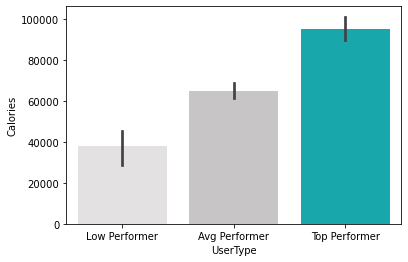

In [63]:
sns.barplot(data=UserCals, x='UserType', y='Calories',
            palette=['#E3E1E2', '#C7C5C6', '#00BFC4'])

 This new variable is added to the main datasets

In [64]:
dailyData = dailyData.merge(UserCals, on='Id', how='inner')
dailyDataLong = dailyDataLong.merge(UserCals, on='Id', how='inner')


In [65]:
ActTimeUserType = dailyData.\
    assign(ActivityTimeH=(dailyData['TotalMinutes'] - dailyData['SedentaryMinutes'])/60).\
    groupby(['Weekday', 'UserType']).agg(
        {'ActivityTimeH': np.average}).reset_index()


 c. Visualize

Text(0.5, 1.0, 'Top performers activity is significantly higher on the weekends')

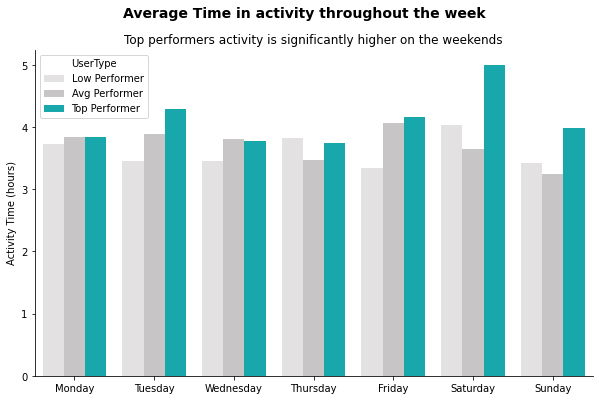

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=ActTimeUserType, x='Weekday', y='ActivityTimeH',
            hue='UserType', palette=['#E3E1E2', '#C7C5C6', '#00BFC4'])

ax.set_xlabel('')
ax.set_ylabel('Activity Time (hours)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Average Time in activity throughout the week',
             size=14, weight='bold')
plt.title('Top performers activity is significantly higher on the weekends')

In [67]:
ActivityDist = dailyDataLong.groupby(['MinutesActivityType', 'UserType']).agg({
    'Hours': np.average}).reset_index()

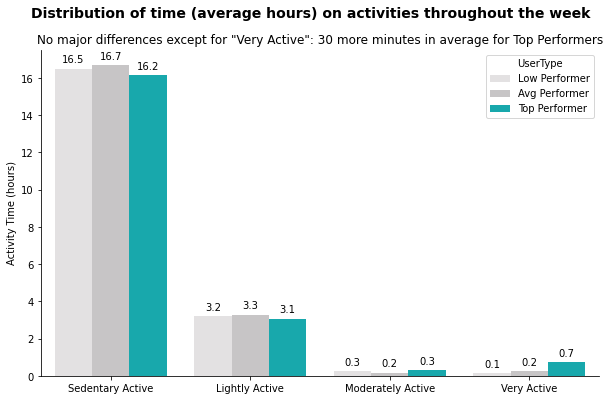

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
bplot = sns.barplot(data=ActivityDist, x='MinutesActivityType', y='Hours',
                    hue='UserType', palette=['#E3E1E2', '#C7C5C6', '#00BFC4'])

ax.set_xlabel('')
ax.set_ylabel('Activity Time (hours)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Distribution of time (average hours) on activities throughout the week',
             size=14, weight='bold')
plt.title('No major differences except for "Very Active": 30 more minutes in average for Top Performers')
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')

 **3. What is the sleep behaviour among users?**

In [69]:
SleepBehavior = dailyData.\
    assign(HoursAsleep=dailyDataLong['TotalMinutesAsleep']/60).\
    query('HoursAsleep > 0').\
    groupby(['Weekday', 'UserType']).agg(
        {"HoursAsleep": np.average}).reset_index()

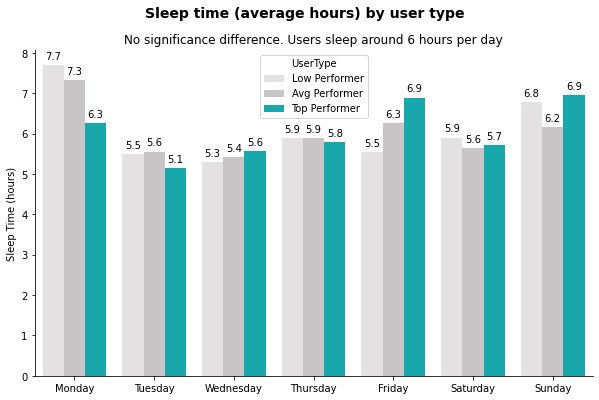

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
bplot = sns.barplot(data=SleepBehavior, x='Weekday', y='HoursAsleep',
                    hue='UserType', palette=['#E3E1E2', '#C7C5C6', '#00BFC4'])

ax.set_xlabel('')
ax.set_ylabel('Sleep Time (hours)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Sleep time (average hours) by user type',
             size=14, weight='bold')
plt.title('No significance difference. Users sleep around 6 hours per day')
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')